In [4]:
from ica import ica1

In [5]:
%matplotlib inline
# Import ica function
from ica import ica1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Define matrix dimensions
Nobs = 10 # Number of observations
Nvars = 10000 # Number of variables
Ncomp = 2 # Number of components

font = 30

C:\Anaconda2\envs\py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


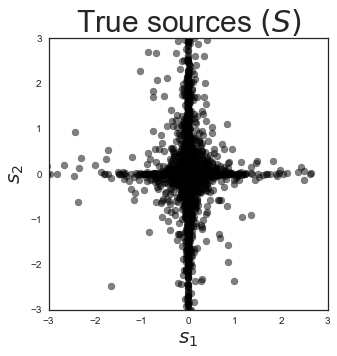

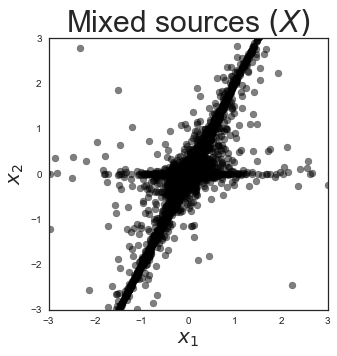

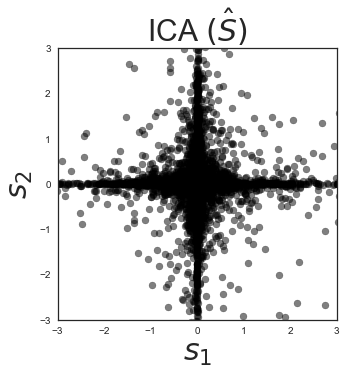

In [6]:
# Simulated true sources
np.random.seed(66)
#rng = np.random.RandomState(42)
#S_true = rng.standard_t(1.5, size=(Ncomp, Nvars))
#S_true = S_true[:, np.logical_and(np.abs(S_true[0,:])<3, np.abs(S_true[1,:])<3)]
S_true = np.random.logistic(0,1,(Ncomp,Nvars))**3
#S_true = np.random.standard_t(1,(Ncomp,Nvars))
S_true = S_true/ S_true.std()
S_true[0, :] /= 4.

# Simulated true mixing
#A_true = np.random.normal(0,1,(Nobs,Ncomp))
A_true = np.array([[1,1],[0,2]])
# X = AS
X = np.dot(A_true,S_true)
# add some noise
#X = X + np.random.normal(0,1,X.shape)

sns.set_style("white")
plt.figure(figsize=(5,5))
df = pd.DataFrame(S_true.T, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=20)
plt.ylabel("$s_2$", fontsize=20)
plt.title('True sources $(S)$', fontsize=font)
plt.savefig('C:/Users/C00310965/Documents/pee/cpe728/infomax/independent_sources.pdf')
plt.figure(figsize=(5,5))
df = pd.DataFrame(X.T[:,:2], columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title('Mixed sources $(X)$', fontsize=font)
plt.savefig('C:/Users/C00310965/Documents/pee/cpe728/infomax/mixed_sources.pdf')

from sklearn.decomposition import FastICA
A, S_pred, _ = ica1(X,2)
S_pred=S_pred.T
temp = np.copy(S_pred)
S_pred[:,0] = temp[:,1]
S_pred[:,1] = temp[:,0]

# S_pred = clf.transform(X.T)
S_pred = S_pred/S_pred.std()
df = pd.DataFrame(S_pred, columns= ['x1', 'x2'])
plt.figure(figsize=(5,5))
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('ICA $(\hat{S})$', fontsize=font)
plt.savefig('C:/Users/C00310965/Documents/pee/cpe728/infomax/estimated_sources.pdf')

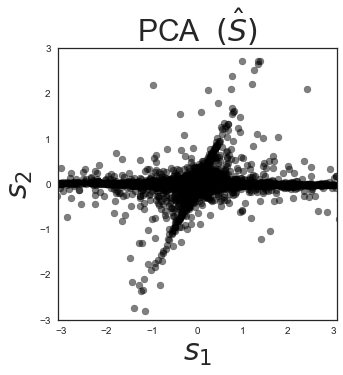

In [7]:

# angle = np.pi/6
# A_true = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
X = np.dot(A_true,S_true)

clf = PCA()
clf.fit(X.T)
S_pred = clf.transform(X.T)

plt.figure(figsize=(5,5))
df = pd.DataFrame(S_pred, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('PCA  $(\hat{S})$', fontsize=font)
plt.savefig('C:/Users/C00310965/Documents/pee/cpe728/infomax/pcaonica_estimated_sources.pdf')

In [ ]:
angle = np.pi/6
A_true = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
X = np.dot(A_true,S_true)
from sklearn.decomposition import PCA

clf = PCA()
clf.fit(X.T)
S_pred = clf.transform(X.T)

sns.set_style("white")
plt.figure(figsize=(5,5))
df = pd.DataFrame(S_true.T, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('True Sources $(S)$', fontsize=font)
plt.axes().set_aspect('equal', 'datalim')
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pca_true_sources.pdf')

plt.figure(figsize=(5,5))
df = pd.DataFrame(X.T, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$x_1$", fontsize=font)
plt.ylabel("$x_2$", fontsize=font)
plt.title('Mixed Sources $(X)$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pca_mixed_sources.pdf')

plt.figure(figsize=(5,5))
df = pd.DataFrame(S_pred, columns= ['x1', 'x2'])
plt.scatter(df["x1"],df["x2"], alpha = 0.5, color='k')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$s_1$", fontsize=font)
plt.ylabel("$s_2$", fontsize=font)
plt.title('Estimated Sources $(\hat{S})$', fontsize=font)
plt.savefig('/home/aulloa/Documents/STAT_thesis/doc/img/pca_estimated_sources.pdf')